# Mapping features into a new space to simplify learning

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math



Let us generate random data: two real fatures, each one generated randomly in the range [-1,1]

In [2]:
X = (np.random.rand(1000,2) - 0.5) * 2
X

array([[-0.15521837, -0.15586711],
       [-0.21265072, -0.54363904],
       [-0.39604992, -0.45232712],
       ..., 
       [-0.63196251,  0.62716198],
       [-0.2724811 ,  0.78981364],
       [-0.99219421, -0.97858024]])

To simplify further processing let us define a function that returns 'r' if a point [x,y] is inside the circle centered in [0,0] with radius 1; the function returns 'b' otherwise. 

*Note*: 'r' and 'b' are used by matplotlib to represent red and blue colors.

In [3]:
def inside_ellipse(x,y):
    if math.sqrt(10*x**2 + 2*y**2) <= 1:
        return 'r'
    else:
        return 'b'

In [4]:
labels = [inside_ellipse(x,y) for [x,y] in X]

Let plot the data and their 'labels'

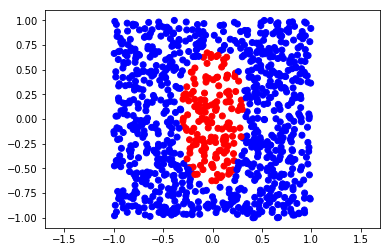

In [5]:
plt.axis("equal")
plt.scatter(X[:,0], X[:,1], marker='o', color=labels)

Let us now map the given data into a new space using the mapping $(x,y) \rightarrow (x^2,y^2)$.

In [6]:
newX = np.array([[x**2,y**2] for [x,y] in X])

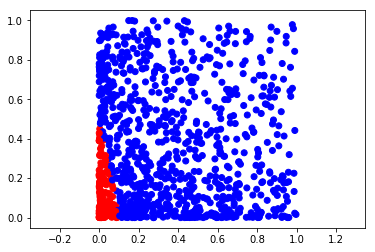

In [7]:
plt.axis("equal")
plt.scatter(newX[:,0], newX[:,1], marker='o', color=labels)

## Exercise

Consider a new classification function:

In [8]:
def classify(x,y):
    tmp_class =  (0.8*x**3 + 0.8*x**2 +  0.6*y**3 + 0.6*y**2)**(1./3. + 0.j)
    if tmp_class.real <= 0.7:
        return 'r'
    else:
        return 'b'

1) re-plot $X$ using the output of `classify(.)` as labels for the examples

2) define a mapping $(x,y) \rightarrow (?,?)$ into a space where the two classes can be separated using a linear classifier

3) plot the mapped data to verify that indeed the mapping is correct

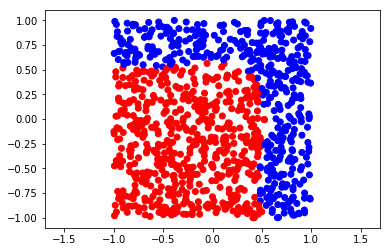

In [9]:
new_labels = [ classify(x,y) for [x,y] in X]
plt.axis("equal")
plt.scatter(X[:,0], X[:,1], marker='o', color=new_labels)

In [35]:
# new mapping for x,y
#from sklearn.metrics.pairwise import rbf_kernel
#mapper = lambda x : ((x**3 + x**2)**(1./3. + 0.j)).real
mapper = lambda x : (x**3 ).real + (x**2).real
#mapper = lambda x : np.exp(-1 * abs(x)**2)
newMap = np.array([[mapper(x) ,mapper(y)] for [x,y] in X])

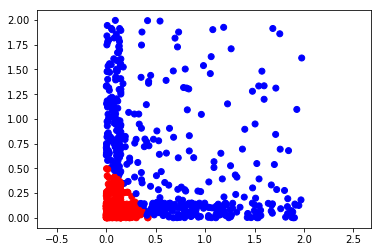

In [36]:
# plot with the new mapping
plt.axis("equal")
plt.scatter(newMap[:,0], newMap[:,1], marker='o', color=new_labels)